<a href="https://www.kaggle.com/code/sitifarahfakhirah/hotel-booking-customer-segmentation-using-k-means?scriptVersionId=244465607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### **By Einsteinium Group - TPL B1**
- Azhar Nadhif Annaufal (J0403221039)
- Siti Farah Fakhirah (J0403221039)
- Aisya Tyanafisya (J0403221039)
- Inbu Aqil Mahendar (J0403221039)

# **PURPOSE STATEMENT**
---

### **Problem Statement**

The hospitality industry faces ongoing challenges in understanding guest booking behavior, such as length of stay, reservation lead time, special requests, and cancellation trends. Without accurate segmentation, hotels are at risk of implementing generalized strategies that fail to meet the expectations of their diverse clientele. This lack of precision can result in inefficient resource allocation, missed revenue opportunities, and diminished guest satisfaction.


### **Objectives**

This project aims to segment hotel guests based on their booking behavior using the KMeans clustering algorithm. By leveraging unsupervised machine learning, the model is expected to reveal customer groups with similar booking patterns and characteristics, such as stay duration, cancellation history, and booking channels. The objective is to extract actionable insights that can be used to design data-driven strategies for service personalization, marketing, and operational planning.


### **Benefit**

1. *Targeted Marketing*: Allows for more personalized promotions based on guest clusters.
2. *Service Optimization*: Enables differentiated services for different customer groups.
3. *Cancellation Management*: Helps identify clusters with higher cancellation rates for preemptive policies.
4. *Capacity Planning*: Assists in forecasting operational load based on guest behavior.


### **Relevance**

This analysis is highly relevant in the domains of business analytics and machine learning, particularly in applications related to hospitality management. It demonstrates the power of unsupervised learning to transform raw data into strategic intelligence, promoting more informed decision-making. The insights derived support sustainable growth by aligning business operations with actual customer behaviors and expectations.

# **HOTEL BOOKING DATASET**
---

The Hotel Booking Demand dataset provides a rich source of information regarding hotel reservations. It includes detailed records about guests, their booking preferences, and hotel characteristics. This real-world dataset has been anonymized for privacy, where all identifying information such as names, emails, phone numbers, and credit card details has been artificially generated using Python. This dataset is particularly suitable for clustering analysis using KMeans, as it contains behavioral and demographic features that can help segment customers into meaningful groups. These segments can then be used for targeted marketing, operational optimization, and predictive analytics in the hospitality industry.


**🏨 Hotel and Reservation Status**
- hotel: Indicates the type of hotel — either "City Hotel" or "Resort Hotel".
- is_canceled: Binary variable indicating if the booking was canceled (1) or not (0).
- reservation_status: Final status of the reservation (e.g., Canceled, Check-Out, No-Show).
- reservation_status_date: Date corresponding to the final status of the reservation.
  

**📅 Arrival Timing and Stay Duration**
- lead_time: Number of days between the booking date and the arrival date.
- arrival_date_year: Year of arrival.
- arrival_date_month: Month of arrival.
- arrival_date_week_number: Week number of arrival.
- arrival_date_day_of_month: Day of the month of arrival.
- stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed.
- stays_in_week_nights: Number of weeknights (Monday to Friday) the guest stayed.


**👨‍👩‍👧‍👦 Guest Information**
- adults: Number of adults.
- children: Number of children.
- babies: Number of babies.
- country: Country of origin of the guest.
- is_repeated_guest: Indicates whether the guest is a returning guest (1) or not (0).
- previous_cancellations: Number of previous bookings that were canceled by the customer.
- previous_bookings_not_canceled: Number of previous bookings that were not canceled.
- customer_type: Type of customer (e.g., Transient, Group, Contract).


**🧾 Booking Details**
- meal: Type of meal package included in the booking.
- market_segment: Market segment designation (e.g., Online TA, Direct, Corporate).
- distribution_channel: Booking distribution channel used.
- reserved_room_type: Code for the room type originally reserved.
- assigned_room_type: Code for the room type actually assigned at check-in.
- booking_changes: Number of changes/amendments made to the booking.
- deposit_type: Type of deposit paid (e.g., No Deposit, Refundable, Non-Refundable).
- agent: Travel agent ID.
- company: Company ID (if applicable).
- days_in_waiting_list: Number of days the booking was on the waiting list before confirmation.
- adr: Average Daily Rate — the average rental income per occupied room per day.
- required_car_parking_spaces: Number of car parking spaces requested by the guest.
- total_of_special_requests: Number of special requests made by the guest (e.g., high floor, extra bed).


**🔐 Synthetic Identity Fields (Not Used in Clustering)**
- name: Artificially generated guest name.
- email: Artificially generated email address.
- phone-number: Artificially generated phone number.
- credit_card: Artificially generated credit card number. 

## **1. Initiation, Import Library & Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Set styles and display options
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset
hotel_data = pd.read_csv('/kaggle/input/hotel-booking-dataset/hotel_booking.csv')

display(hotel_data.head())

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## **2. EDA (Exploratory Data Analysis)**

In [4]:
print(hotel_data.shape)

(119390, 36)


In [5]:
print(hotel_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
print(hotel_data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

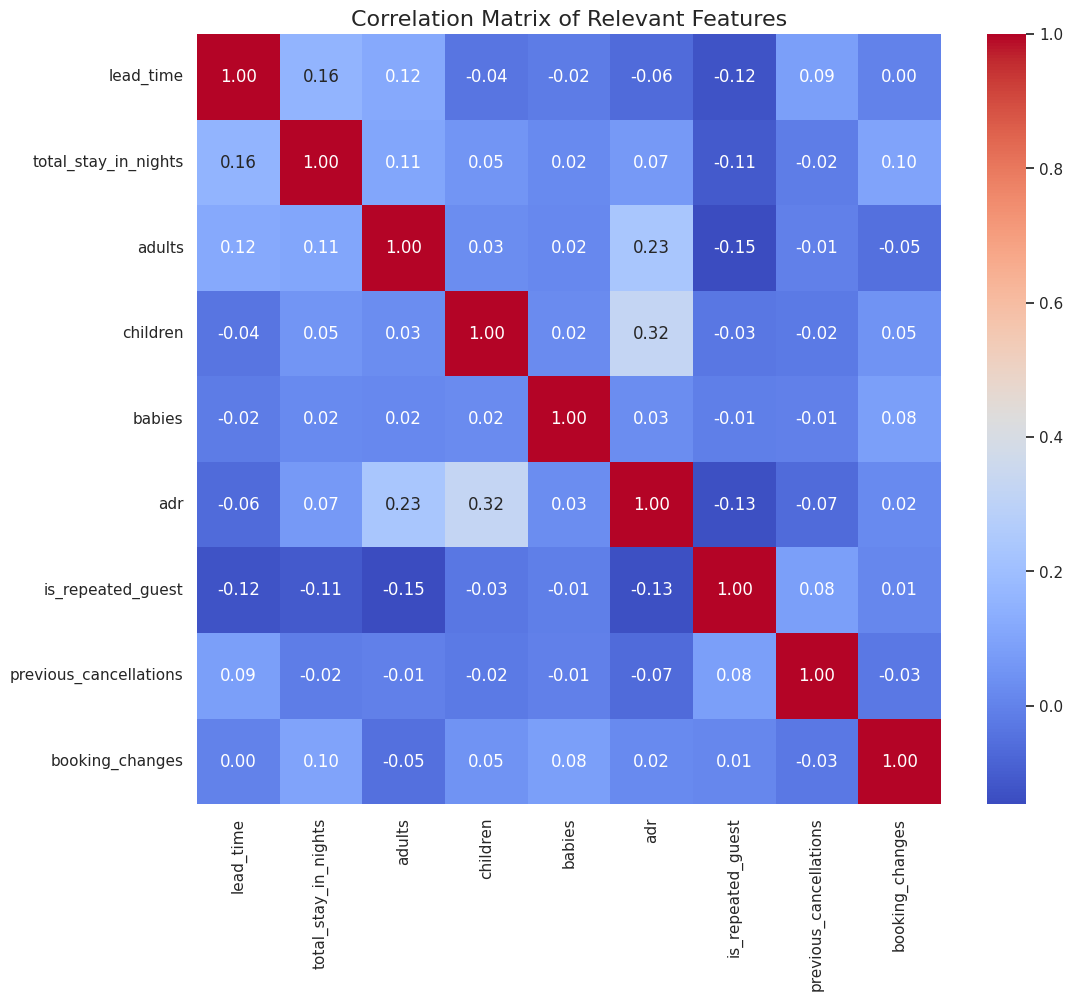

In [7]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))

hotel_data['total_stay_in_nights'] = hotel_data['stays_in_week_nights'] + hotel_data['stays_in_weekend_nights']
relevant_features = [
    'lead_time', 'total_stay_in_nights', 'adults', 'children', 'babies', 'adr', 
    'is_repeated_guest', 'previous_cancellations', 'booking_changes'
]

corr_matrix = hotel_data[relevant_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Features', fontsize=16)
plt.show()

The heatmap above illustrates the correlation between several key features in the dataset. Each number in the heatmap box represents the level of correlation between features, with values ranging from -1 to 1. Here are some key correlations that occur:

1. **Lead Time vs. adr**: There is a strong positive correlation (0.32) between lead_time and adr. This suggests that the longer the booking time, the higher the average daily rate. This indicates that customers who book earlier tend to choose higher-priced rooms.

2. **Total Stay in Nights vs. Babies/Children**: A positive correlation between total_stay_in_nights and the number of babies/children (0.32) suggests that families with children tend to stay longer. This can help personalize services for families staying at the hotel.

3. **Lead Time vs. Previous Cancellations**: A negative correlation (-0.12) between lead_time and previous_cancellations suggests that the longer the booking time, the less likely cancellations are to occur. This can be interpreted that bookings made earlier are more stable and have a lower risk of being canceled.

By understanding the relationship between lead_time and adr, the hotel can adjust pricing strategies for customers who book earlier, while understanding the relationship between total_stay_in_nights and children can help design specific facilities or promotions for families.

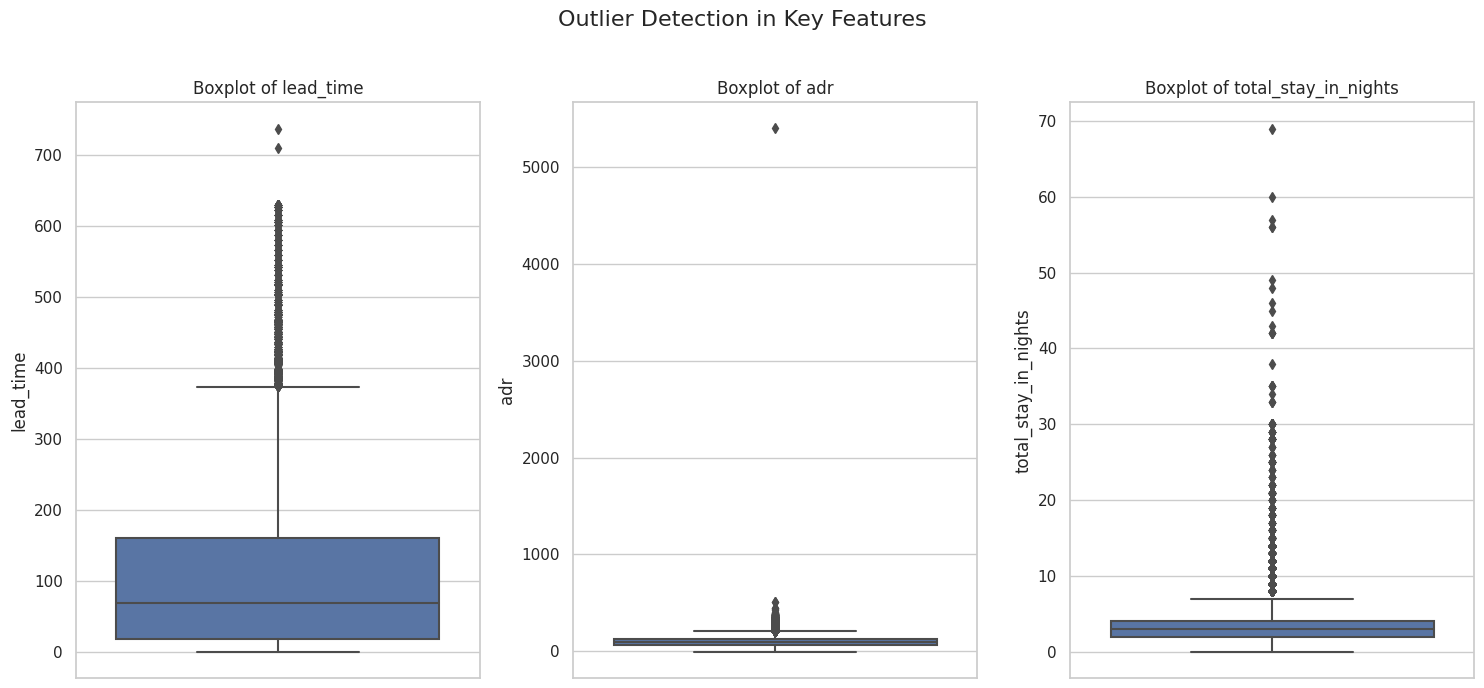

In [8]:
# Outlier Detection using Boxplots
features_to_check = ['lead_time', 'adr', 'total_stay_in_nights']

plt.figure(figsize=(15, 7))
plt.suptitle('Outlier Detection in Key Features', fontsize=16)

# Use the correct DataFrame 'hotel_data' for plotting
for i, feature in enumerate(features_to_check):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=hotel_data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The boxplot above reveals the presence of outliers that need to be considered in further analysis. Features such as **lead_time**, **adr**, and **total_stay_in_nights** have critical values that influence the results of the analysis and the model.

1. **Lead Time**: The very high outlier values indicate that there are some bookings with much longer times than the average, which could affect the analysis of long-term booking behavior.

2. **Average Daily Rate (adr)**: Outliers in this column suggest that there are very high nightly prices, which could be caused by premium room bookings or special pricing. This could also lead to guest segmentation with different booking patterns.

3. **Total Stay in Nights**: Stays with very long durations (outliers) reflect customers who stay longer than the average, which may also affect booking strategies and hotel capacity management.

These outliers need to be addressed because they could impact the results of the analysis and the model. For example, if the KMeans model is used without handling the outliers, the model may capture patterns that are not representative of the majority of the data.

## **3. Preprocessing & Transformation Data**

In [9]:
# Create a clean copy to work with
df_processed = hotel_data.copy()

In [10]:
# Delete Identifying Information Column
hotel_data = hotel_data.drop(['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date'], axis=1)

Columns containing personal information such as **name**, **email**, **phone-number**, **credit_card**, and **reservation_status_date** were removed to avoid data leakage and maintain privacy in the analysis, as these columns do not contribute to guest segmentation.

In [11]:
# Data Cleaning
df_processed = df_processed.dropna(subset=['country'])
df_processed['children'] = df_processed['children'].fillna(0)
df_processed['agent'] = df_processed['agent'].fillna(0)
df_processed['company'] = df_processed['company'].fillna(0)

# Convert data types
df_processed['children'] = df_processed['children'].astype(int)
df_processed['agent'] = df_processed['agent'].astype(int)

#Feature Engineering
df_processed['total_stay'] = df_processed['stays_in_week_nights'] + df_processed['stays_in_weekend_nights']
df_processed['total_guests'] = df_processed['adults'] + df_processed['children'] + df_processed['babies']

#Clean Anomalies
df_processed = df_processed[(df_processed['total_guests'] > 0) & (df_processed['total_stay'] > 0)].copy()

display(df_processed.isnull().sum().head())

hotel                 0
is_canceled           0
lead_time             0
arrival_date_year     0
arrival_date_month    0
dtype: int64

* The **children**, **agent**, and **company** columns, which contain null values, were filled with default values (e.g., 0 for children, agent, and company). This technique for filling missing values ensures that data is not lost, which could affect the model.
* The **total_stay** column was created by summing the number of nights spent during the week and weekend (stays_in_week_nights and stays_in_weekend_nights) as well as the number of guests (adults, children, and babies). This provides a better picture of the total duration of the guest's stay, which is relevant for segmentation.
* Data with **total_guests** and **total_stay** values less than or equal to 0 were cleaned. This prevents invalid or unrealistic data from affecting further analysis.

In [12]:
# Feature Selection
numerical_features = [
    'lead_time', 'total_stay', 'total_guests', 'adr', 'is_repeated_guest',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'total_of_special_requests'
]
categorical_features = ['market_segment', 'distribution_channel', 'reserved_room_type']

# Create Final Model Dataframe
df_model = df_processed[numerical_features + categorical_features].copy()

In [13]:
# Outlier Handling
for col in ['adr', 'lead_time']:
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df_model[col] = np.where(df_model[col] > upper_bound, upper_bound, df_model[col])

The **Interquartile Range (IQR)** method was used to detect and handle outliers. The **lead_time** column was calculated by identifying values outside the interquartile range (Q1 and Q3), and these outliers were cleaned by replacing them with reasonable bounds. This handling is important to prevent clustering models like KMeans from being "pulled" by extreme values that do not reflect general patterns.

In [14]:
# Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform data
X_processed = preprocessor.fit_transform(df_model)
print("Preprocessing complete without warnings. Final data shape for clustering:", X_processed.shape)

Preprocessing complete without warnings. Final data shape for clustering: (118092, 31)


Normalization was performed using **StandardScaler**, ensuring that each feature has a uniform range (mean = 0, standard deviation = 1). This is important because algorithms like KMeans are very sensitive to feature scaling. Next, categorical features like **market_segment**, **distribution_channel**, and **reserved_room_type** were converted into numerical format using **OneHotEncoder**. This process converts categories into binary variables, making it easier for the model to process.

In [15]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
print(f"Explained variance by PC1 and PC2: {pca.explained_variance_ratio_.sum()*100:.2f}%")

Explained variance by PC1 and PC2: 31.70%


**PCA (Principal Component Analysis)** was used to reduce the data's dimensions, so that data originally with many features could be reduced to two main dimensions for visualizing the data in two dimensions and reducing feature redundancy, while retaining most of the relevant information. **PC1** and **PC2** explain about **31.7%** of the data's variance, which means these two components cover significant information.

## **4. K-Means Modelling**

In [16]:
# Determine Optimal k with Elbow and Silhouette Methods
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed, kmeans.labels_))

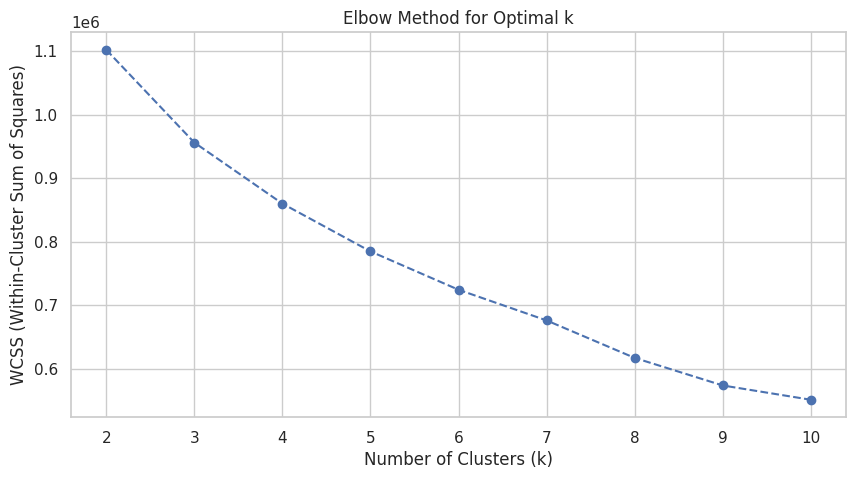

In [17]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Based on the Elbow Method graph displayed, there is a significant drop in **WCSS** as the number of clusters increases from 1 to 4, after which the decline becomes more gradual. The point where the decrease starts to slow down (at k=4) is the "elbow," indicating that segmenting with four clusters will provide the most efficient division of data with similar characteristics.

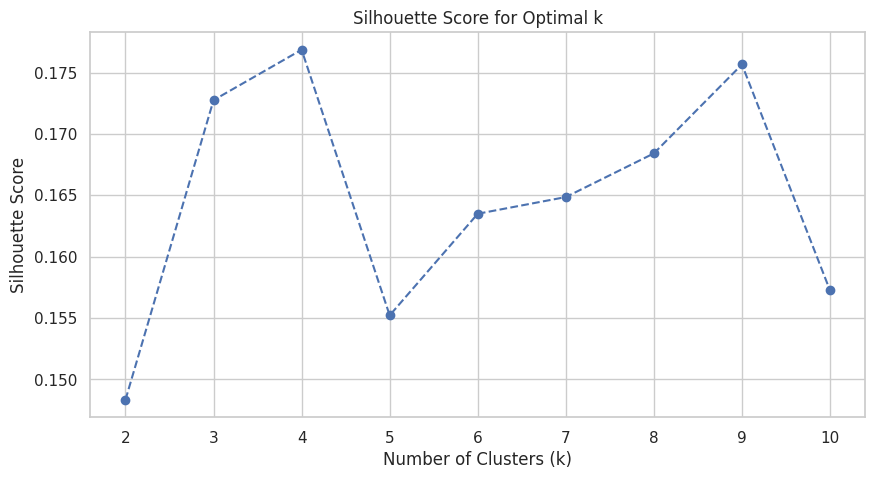

In [18]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The graph shows that the **Silhouette Score** reaches its peak and highest score at k=4. After that, the score drops, indicating that the model with k=4 provides the best segmentation in terms of consistency and separation between clusters.

Based on the **Elbow Method** and **Silhouette Score**, the optimal number of clusters for the KMeans model in this dataset is 4, which provides clear and relevant segmentation for more focused hotel guest grouping and allows the hotel to develop more effective strategies in pricing, marketing, and capacity planning.

In [19]:
# Train the Final K-Means Model
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X_processed)

print(f"Final K-Means model with k={optimal_k} has been trained.")

Final K-Means model with k=4 has been trained.


## **5. Analysis & Visualization**

In [20]:
# Add cluster labels to PCA and model dataframes
df_pca['KMeans_Cluster'] = kmeans_labels
df_model['KMeans_Cluster'] = kmeans_labels

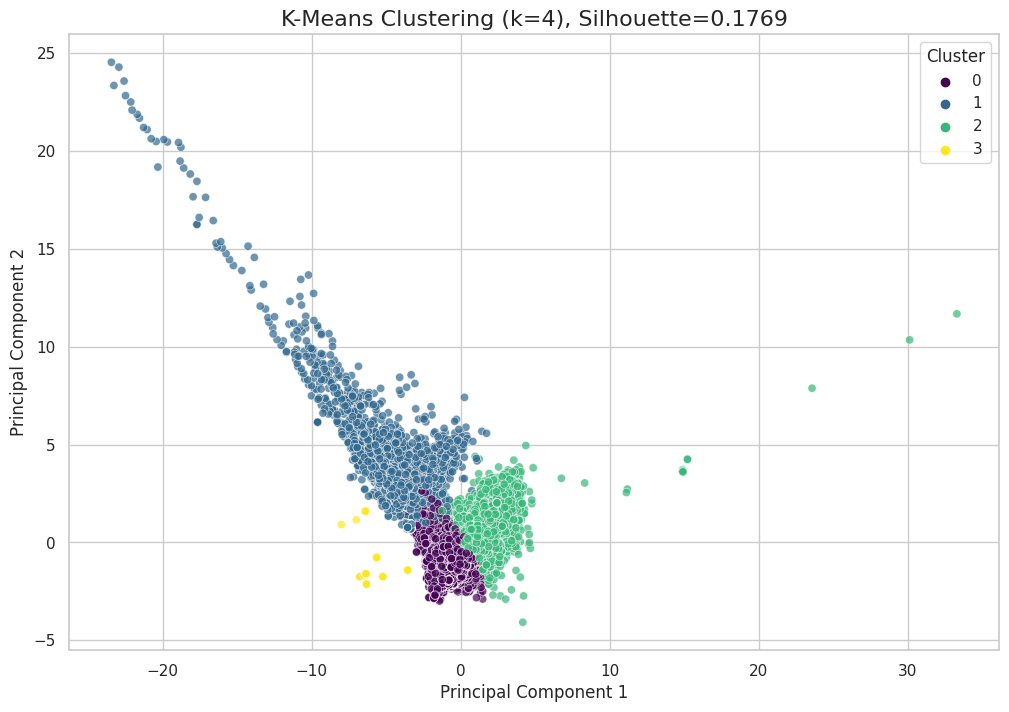

In [24]:
# Visualization on PCA Space
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='KMeans_Cluster', palette='viridis', alpha=0.7)
plt.title(f'K-Means Clustering (k={optimal_k}), Silhouette={final_silhouette_score:.4f}', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

The **PCA visualization** provides insights into how the data is distributed and how each cluster is separated, helping in selecting the optimal cluster. Based on the results above, here are some key insights:

* **Cluster 0**: Tends to be spread across areas with lower **Principal Component 1** values. This suggests that guests in this cluster tend to have different booking characteristics, such as shorter lead times and lower prices.
* **Cluster 3**: Appears more focused in the higher areas for both **Principal Component 1** and **Principal Component 2**, indicating that guests in this cluster have longer booking patterns (higher lead times) and higher nightly prices (**adr**). This represents a cluster of guests who prefer premium services and make bookings well in advance.

In [22]:
# K-Means Cluster Profiles
# For numerical features, calculate the mean. For categorical, the mode.
kmeans_profile_num = df_model.groupby('KMeans_Cluster')[numerical_features].mean()
kmeans_profile_cat = df_model.groupby('KMeans_Cluster')[categorical_features].agg(lambda x: x.mode()[0])
display(pd.concat([kmeans_profile_num, kmeans_profile_cat], axis=1))

,lead_time,total_stay,total_guests,adr,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,total_of_special_requests,market_segment,distribution_channel,reserved_room_type
KMeans_Cluster,,,,,,,,,,,,
0,118.471178,3.146352,1.757949,82.278033,0.000000,0.070907,0.012995,0.173385,0.199064,Offline TA/TO,TA/TO,A
1,33.156091,2.085552,1.416997,69.354518,0.986686,0.486119,4.084136,0.275354,0.652408,Corporate,Corporate,A
2,83.050869,4.049097,2.372668,135.543600,0.000000,0.009571,0.004693,0.287887,1.176717,Online TA,TA/TO,A
3,229.703448,3.868966,2.000000,58.147724,0.089655,21.979310,0.075862,0.006897,0.000000,Groups,TA/TO,A


The results of cluster profiling based on **KMeans_Cluster** show average information for various numerical and categorical features per cluster, including:

* **Cluster 0**: Guests who tend to book in a short time, with lower room prices and few special requests.
* **Cluster 1**: Guests with short lead times, frequent booking cancellations, but making many special requests.
* **Cluster 2**: Guests who more frequently return, choose premium rooms, make more special requests, and mostly book through online travel agents.
* **Cluster 3**: Guests who book well in advance, with high prices, very few special requests, and many coming from large groups.

In [23]:
# Quantitative Evaluation
final_silhouette_score = silhouette_score(X_processed, kmeans_labels)
print(f"\nFinal Silhouette Score for k={optimal_k}: {final_silhouette_score:.4f}")


Final Silhouette Score for k=4: 0.1769


The **Silhouette Score** for k=4 with a value of 0.1769 indicates that the segmentation generated by KMeans with 4 clusters provides a fairly good division, with acceptable separation between clusters. However, it also suggests that there is room to improve the separation between clusters to make the segmentation clearer.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

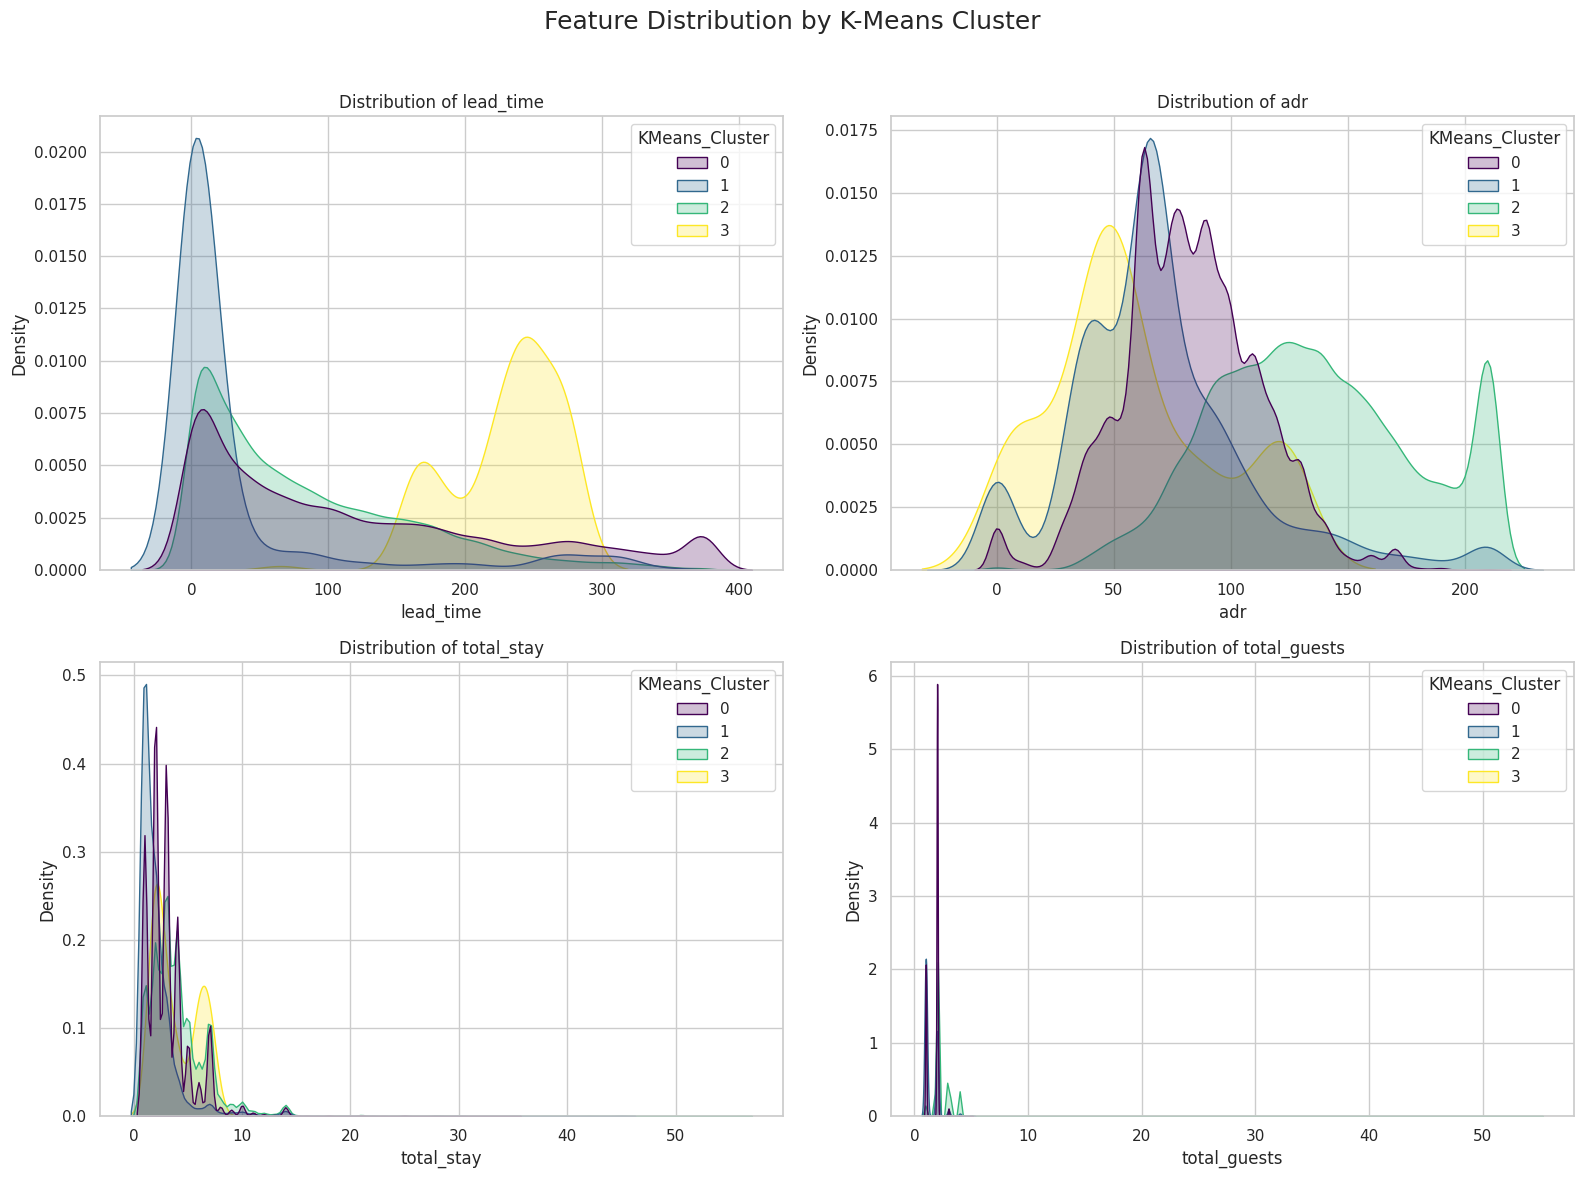

In [25]:
# Feature Distribution

features_to_visualize = ['lead_time', 'adr', 'total_stay', 'total_guests']
plt.figure(figsize=(16, 12))
plt.suptitle('Feature Distribution by K-Means Cluster', fontsize=18)

for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=df_model, x=feature, hue='KMeans_Cluster', palette='viridis', fill=True, common_norm=False)
    plt.title(f'Distribution of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

This visualization provides a more detailed view of how each cluster is distributed in terms of key features such as **lead_time**, **adr** (Average Daily Rate), **total_stay**, and **total_guests**. Analyzing these features allows us to better understand the characteristics of guests in each cluster.

**1. Lead Time**
Cluster 3 shows a higher lead time, indicating that guests in this cluster tend to book far in advance, suggesting bookings for special needs or more planned trips. In Cluster 0 and Cluster 1, guests are more likely to make bookings in a shorter time frame.

**2. ADR (Average Daily Rate)**
Cluster 3 shows a higher **adr** distribution, indicating that guests in this cluster prefer premium rooms or more expensive types of services. This could suggest customers with a larger budget or a preference for higher comfort. In Cluster 0 and Cluster 1, guests tend to choose more affordable rooms.

**3. Total Stay**
In Cluster 0, the **total stay** distribution is narrower with shorter durations, indicating that this cluster is dominated by guests who stay for a short period. This could refer to business or transit guests who stay for just one or two nights. In contrast, guests in Cluster 3 tend to stay longer, which could indicate guests traveling for long vacations or with longer stay requirements.

**4. Total Guests**
Cluster 1 shows a higher distribution of **total guests**, likely consisting of larger groups. This could represent customers coming for group events, such as conferences or family gatherings. In Cluster 0 and Cluster 3, guests tend to consist of individuals or small families, with fewer guests.

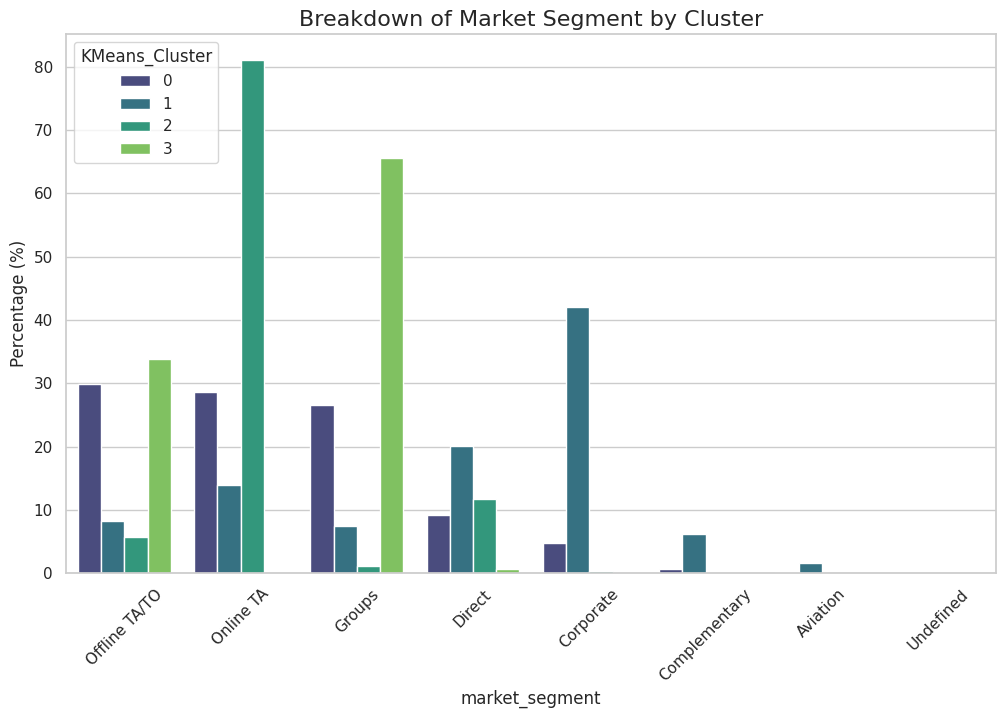

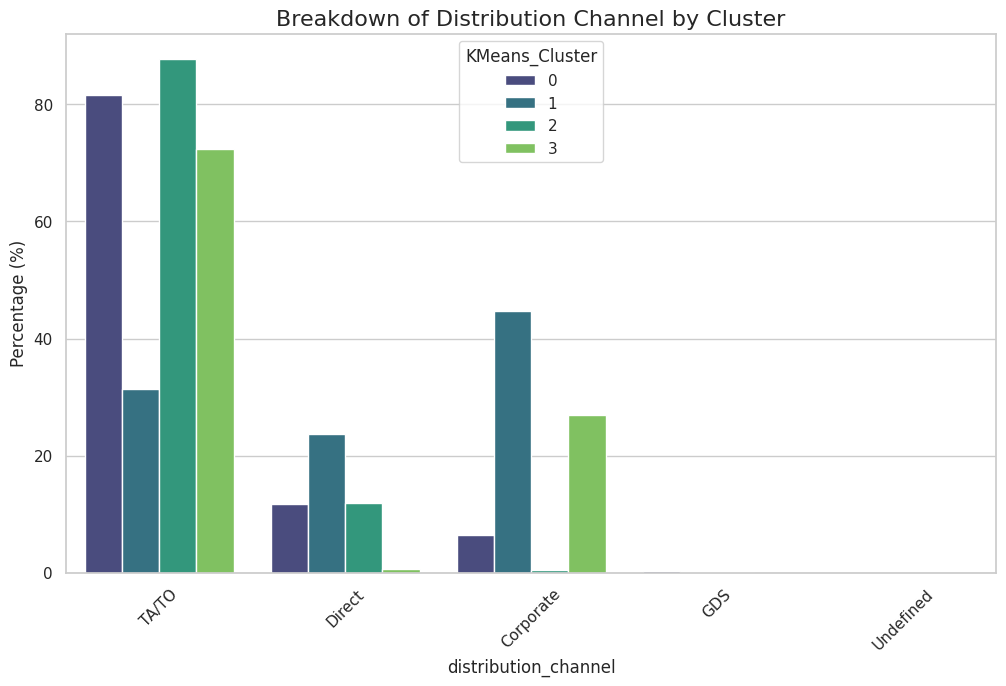

In [26]:
# Categorical Feature Breakdown
cat_features_to_analyze = ['market_segment', 'distribution_channel']
for feature in cat_features_to_analyze:
    plt.figure(figsize=(12, 7))
    analysis_df = df_model.groupby('KMeans_Cluster')[feature].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    
    sns.barplot(x=feature, y='percentage', hue='KMeans_Cluster', data=analysis_df, palette='viridis')
    plt.title(f'Breakdown of {feature.replace("_", " ").title()} by Cluster', fontsize=16)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()

In **Graph 1: Breakdown of Market Segment by Cluster**, the graph shows the percentage distribution of **market_segment** (market segment) per cluster. Here is the explanation:

* **Cluster 0**: The majority of guests in this cluster come from the **Offline TA/TO** segment, indicating that they are more likely to book through offline travel agents.
* **Cluster 1**: Guests in this cluster are dominated by the **Online TA** segment, which indicates a preference for booking through online travel agents.
* **Cluster 2**: The majority of guests in this cluster come from the **Groups** segment, indicating that they come as a large group, such as for events or conferences.
* **Cluster 3**: The majority of guests in this cluster come from the **Direct** segment, meaning they book directly with the hotel. This indicates a higher level of loyalty or direct bookings from repeat customers.

Guests in different clusters show clear booking patterns based on their market segment. The **Offline TA/TO** segment is more prominent in **Cluster 0**, while the **Direct** segment is more prominent in **Cluster 3**. This could suggest that hotels can tailor their marketing strategies for each of these segments.

---

Meanwhile, in **Graph 2: Breakdown of Distribution Channel by Cluster**, the graph illustrates the distribution of **distribution_channel** per cluster, showing the booking channels used by guests. Here is the explanation:

* **Cluster 0**: The majority of guests in this cluster book through **TA/TO** (Travel Agents/Tour Operators), indicating that they are more likely to use travel agents to make bookings.
* **Cluster 1**: Guests in this cluster tend to book through both **Direct** and **TA/TO** channels, with more bookings being made directly.
* **Cluster 2**: This cluster has a more balanced distribution of channels, with the majority of guests booking through both **TA/TO** and **Direct**.
* **Cluster 3**: The majority of guests in this cluster use the **TA/TO** channel, but some also book through **Direct**.

The differences in distribution channels used by each cluster provide useful information to optimize booking strategies and resource allocation.

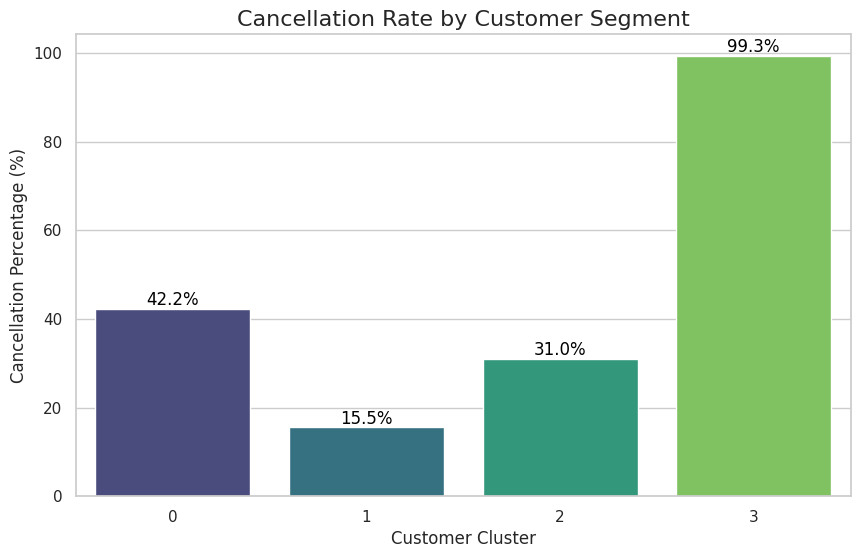

In [27]:
# Cancellation Rate
df_processed['KMeans_Cluster'] = df_model['KMeans_Cluster']

# Calculate cancellation rate per cluster
cancellation_analysis = df_processed.groupby('KMeans_Cluster')['is_canceled'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
canceled_df = cancellation_analysis[cancellation_analysis['is_canceled'] == 1]

plt.figure(figsize=(10, 6))
sns.barplot(x='KMeans_Cluster', y='percentage', data=canceled_df, palette='viridis')
plt.title('Cancellation Rate by Customer Segment', fontsize=16)
plt.ylabel('Cancellation Percentage (%)')
plt.xlabel('Customer Cluster')
for index, row in canceled_df.iterrows():
    plt.text(row.KMeans_Cluster, row.percentage, f'{row.percentage:.1f}%', color='black', ha="center", va="bottom")
plt.show()

The graph above shows the **cancellation rate** per cluster, or the percentage of bookings that were canceled by guests in each cluster. From the graph, the following information can be derived for each cluster:

* **Cluster 0** has a cancellation rate of **42.2%**, indicating that more than half of the guests in this cluster canceled their bookings. This suggests a need to improve cancellation management strategies or provide incentives to reduce cancellations.
* **Cluster 1** has a cancellation rate of **15.5%**, which is lower than Cluster 0, indicating that booking cancellations are more controlled.
* **Cluster 2** has a cancellation rate of **31.0%**, which is still higher than Cluster 1, but lower than Cluster 0.
* **Cluster 3** has a cancellation rate of **99.3%**, which is very high, indicating that most guests in this cluster canceled their bookings. This may suggest a more unstable booking pattern or a mismatch between guest expectations and reality.